In [90]:
import pandas as pd

#importing data
removed_columns = ['date', 'sqft_above', 'zipcode', 'lat', 'long','waterfront','id', 'sqft_basement']
df = pd.read_csv('data/kc_house_data.csv').drop(removed_columns, axis = 'columns')

# Exploring and Cleaning Data

In [91]:
#checking to see if any columns have null values
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view               63
condition           0
grade               0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

In [92]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [93]:
#Using yr_renovated to create a new "True" or "False" renovated column using 1s and 0s to address null values
df['renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0.0 else 1).astype(int)

In [94]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [95]:
#creating lists for new 'view' values
view_name = ['NONE','FAIR','AVERAGE','GOOD','EXCELLENT']
view_value = [1, 2, 3, 4, 5]

#replacing values in 'view' with the proper numerical value
df['view'] = df['view'].replace(view_name, view_value)

In [112]:
df.isnull().sum(axis=0)

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
view             63
condition         0
grade             0
yr_built          0
sqft_living15     0
sqft_lot15        0
renovated         0
dtype: int64

In [104]:
#repeating to transform 'condition' into a 1-5 scale
condition_name = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
condition_value =  [1, 2, 3, 4, 5]

df['condition'] = df['condition'].replace(condition_name, condition_value)

In [105]:
#replacing all letters with a space and turning into them into integers
df['grade'] = df['grade'].str.replace(r"\D", '').astype(int)
df['grade']

C:\Users\dtong\AppData\Local\Temp\ipykernel_6064\1935687581.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['grade'] = df['grade'].str.replace(r"\D", '').astype(int)


0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 21597, dtype: int32

In [106]:
#dropping yr_renovated column because I cannot use it and it has many NaN values
df = df.drop('yr_renovated', axis=1)

In [113]:
df.isnull().sum(axis = 0)

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
view             63
condition         0
grade             0
yr_built          0
sqft_living15     0
sqft_lot15        0
renovated         0
dtype: int64

In [114]:
#'view' still has some NaN values. I could enter them as 0 values but I don't think it would make sense with my 1-5 scale, so I think it is better to just remove the 63 entries with NaN values
df = df.dropna()
df = df.reset_index(drop=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21534 entries, 0 to 21533
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   view           21534 non-null  float64
 7   condition      21534 non-null  int64  
 8   grade          21534 non-null  int32  
 9   yr_built       21534 non-null  int64  
 10  sqft_living15  21534 non-null  int64  
 11  sqft_lot15     21534 non-null  int64  
 12  renovated      21534 non-null  int32  
dtypes: float64(4), int32(2), int64(7)
memory usage: 2.0 MB


In [117]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,sqft_living15,sqft_lot15,renovated
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,1.233863,3.409724,7.657425,1971.002275,1986.299944,12751.079502,0.212362
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.765686,0.650654,1.172643,29.376044,685.121001,27255.483308,0.408989
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,1.000000,3.000000,1900.000000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1.000000,3.000000,7.000000,1951.000000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,1.000000,3.000000,7.000000,1975.000000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,1.000000,4.000000,8.000000,1997.000000,2360.000000,10083.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,5.000000,13.000000,2015.000000,6210.000000,871200.000000,1.000000


## Examining Data with Visualizations

In [120]:
#Creating X and y to examine relationship between variables and 'price'
X = df.drop(['price'], axis=1)
y = df[['price']]

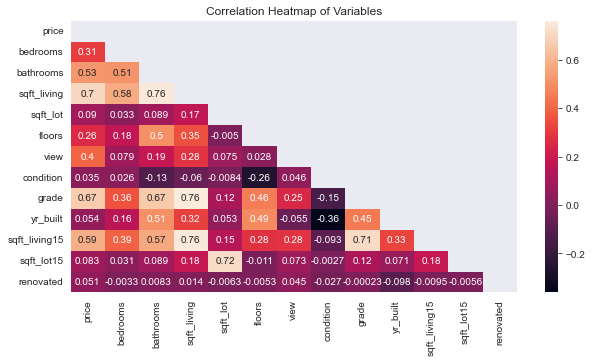

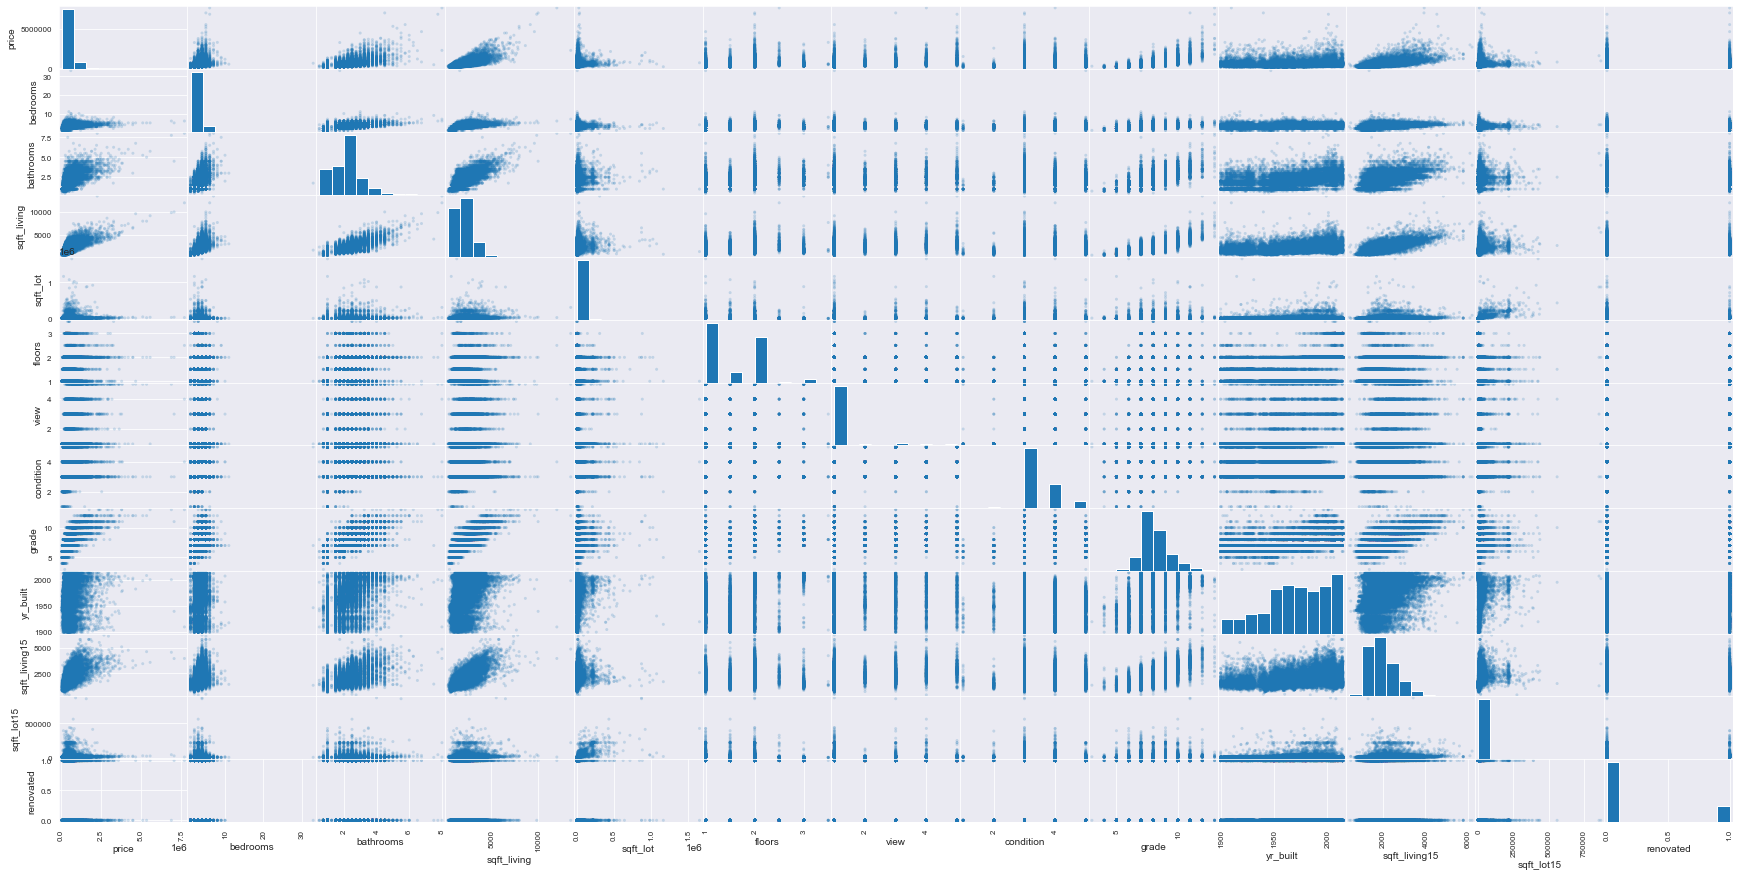

In [121]:
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np

#heatmap to show multicollinearity
heatmap_df = pd.concat([y, X], axis=1)
corr = heatmap_df.corr()

fig, ax = plt.subplots(figsize = (10,5))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr,dtype=bool)),
    ax=ax,
    annot=True
)

ax.set_title('Correlation Heatmap of Variables')

#visualization of multicollinearity of predictor variables
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(30,15));

## Creating a Linear Model around sqft_living and price

In [122]:
from sklearn import linear_model

#Initialize model
regression_model = linear_model.LinearRegression()

#train the model
regression_model.fit(X=pd.DataFrame(df['sqft_living']), y=df['price'])

#check trained model y-intercept and coefficient and score
print('y-intercept: ', regression_model.intercept_)
print('coefficient: ', regression_model.coef_)
print('R-Squared:   ', regression_model.score(X=pd.DataFrame(df['sqft_living']), y=df['price']))

y-intercept:  -42152.94680562895
coefficient:  [279.93211535]
R-Squared:    0.4922247077876327


In [123]:
train_prediction = regression_model.predict(X = pd.DataFrame(df['sqft_living']))

#Actual - prediction = residuals

residuals = df['price'] - train_prediction
residuals.describe()

count    2.153400e+04
mean    -2.627103e-11
std      2.608480e+05
min     -1.468128e+06
25%     -1.474790e+05
50%     -2.439263e+04
75%      1.062302e+05
max      4.368971e+06
Name: price, dtype: float64

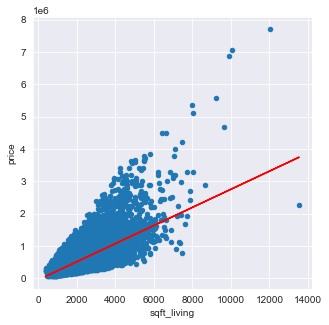

In [124]:
#scatterplot of sqft_living vs price
df.plot(kind='scatter', x='sqft_living', y='price', figsize=(5,5))

#best fit line from regression
plt.plot(df['sqft_living'], #explanatory variable
         train_prediction,  #predicted values
         color='r'
        );

In [125]:
poly_model = linear_model.LinearRegression()

#Create dataframe of predictors
predictors = pd.DataFrame([df['sqft_living'], df['sqft_living']**2]).T

#Train the model using the new data
poly_model.fit(X = predictors, y = df['price'])

#trained model y-intercept
print('model intercept: ', poly_model.intercept_)

#traiend model coefficients (scaling factor given to 'price')
print('model coefficients: ', poly_model.coef_)

#R-Squared
print('model r-squared: ', poly_model.score(X=predictors, y=df['price']))

model intercept:  196299.05423205317
model coefficients:  [7.10671163e+01 3.79210099e-02]
model r-squared:  0.5308327949279945


In [126]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#OLS
outcome = 'price'
#Remove some categorical data
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     3170.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:59:24   Log-Likelihood:            -2.9546e+05
No. Observations:               21534   AIC:                         5.909e+05
Df Residuals:                   21521   BIC:                         5.910e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.224e+06   1.34e+05     46.289      0.000    5.96e+06    6.49e+06
bedrooms       -4.21e+04   2073.847    -20.303      0.000   -4.62e+04    -3.8e+04
bathrooms      4.651e+04   3500.884     13.285      0.000    3.96e+04    5.34e+04
sqft_living     165.7222      3.662     45.260      0.000     158.545     172.899
sqft_lot         -0.0295      0.052     -0.566      0.572      -0.132       0.073
floors         2.748e+04   3505.168      7.840      0.000    2.06e+04    3.44e+04
view           7.002e+04   2108.538     33.209      0.000    6.59e+04    7.42e+04
condition      1.946e+04   2514.129      7.739      0.000    1.45e+04    2.44e+04
grade          1.195e+05   2291.551     52.132      0.000    1.15e+05    1.24e+05
yr_built      -3616.8422     69.007    -52.413      0.000   -3752.100   -3481.584
sqft_living15    20.3513      3.601      5.652      0.000      13.294      27.409
sqft_lot15       -0.5332      0.080     -6.678      0.000      -0.690      -0.377
renovated      9054.1322   3706.994      2.442      0.015    1788.148    1.63e+04
==============================================================================
Omnibus:                    16952.844   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1274605.972
Skew:                           3.232   Prob(JB):                         0.00
Kurtosis:                      40.132   Cond. No.                     4.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
from sklearn.linear_model import LinearRegression

y = df['price']
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression()

In [128]:
linreg.coef_

array([-4.21044095e+04,  4.65083162e+04,  1.65722163e+02, -2.95164701e-02,
        2.74800524e+04,  7.00223356e+04,  1.94571972e+04,  1.19463848e+05,
       -3.61684219e+03,  2.03512530e+01, -5.33221054e-01,  9.05413215e+03])

In [129]:
linreg.intercept_

6224122.162640579

In [130]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [131]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,sqft_living15,sqft_lot15,renovated
2359,3,1.75,2600,105587,1.0,1.0,4,7,1980,1941,208438,0
20039,4,2.50,2900,4950,2.0,1.0,3,8,2004,2590,4950,0
9308,3,2.50,2507,18400,2.0,1.0,3,8,2006,1520,14709,1
10798,3,1.75,2350,20820,1.0,1.0,4,8,1978,2040,10800,0
18387,4,2.50,2430,5959,2.0,1.0,3,8,2002,2100,5414,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1634,2,1.00,1100,6240,1.0,1.0,4,7,1941,1250,6240,0
20740,2,2.50,1160,1219,3.0,1.0,3,8,2007,1320,2800,0
7855,3,1.50,1370,8470,1.0,1.0,4,7,1961,1710,8800,0
4158,3,1.00,1250,4800,1.0,1.0,4,7,1951,1404,4800,0


In [141]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=linreg,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.6385555415086849
Validation score: 0.6251297975814011


## Train Test

In [132]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y= df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [136]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,sqft_living15,sqft_lot15,renovated
15721,3,1.75,1270,7700,1.0,1.0,4,7,1968,1510,7700,0
8259,4,2.50,2980,210395,2.0,1.0,3,9,2001,2530,45596,0
8176,1,0.75,930,29258,1.0,1.0,3,6,1941,2000,18321,0
21277,4,2.50,3570,6054,2.0,1.0,3,9,2014,3600,6050,1
15142,3,1.50,970,8400,1.0,1.0,3,7,1966,1230,8400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,3,2.50,2260,10153,2.0,1.0,3,10,1987,2740,10153,0
17289,4,2.75,2630,7505,2.0,1.0,3,8,1994,2670,7506,0
5192,3,2.75,1990,19991,1.0,1.0,3,7,1977,1750,9775,0
12172,4,2.25,2192,12128,2.0,1.0,3,8,2006,1914,4649,0


In [134]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,sqft_living15,sqft_lot15,renovated
1383,4,2.50,2403,6172,2.0,1.0,3,9,1999,2380,6075,0
300,3,2.25,2200,8750,1.0,1.0,4,7,1964,1460,10139,0
6565,3,2.00,1860,7232,1.0,1.0,3,7,1985,1830,7220,0
11324,3,1.50,1540,4773,2.0,1.0,3,8,1941,1540,5750,1
4077,3,2.00,1340,6783,1.0,1.0,4,7,1987,1630,6458,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18092,4,2.50,2450,6941,2.0,1.0,3,7,2006,3300,6941,0
21097,4,3.50,3390,3960,2.0,1.0,3,10,2008,2990,3400,0
18507,3,1.75,1370,8006,2.0,1.0,3,7,1990,1530,8006,0
15261,4,3.50,4150,16197,2.0,1.0,3,10,2006,3618,15210,0


In [135]:
X_test.value_counts()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  condition  grade  yr_built  sqft_living15  sqft_lot15  renovated
4         1.00       1290         5000      1.5     1.0   3          7      1957      1440           2500        0            2
5         2.50       2000         3600      1.0     1.0   3          6      1987      1410           3600        0            2
3         2.00       1540         6000      1.0     1.0   4          6      1953      1490           8213        0            2
4         2.50       2150         7670      1.0     1.0   5          7      1976      1610           7350        0            2
2         1.00       910          9000      1.0     1.0   3          5      1923      1290           9000        0            2
                                                                                                                             ..
3         1.75       2140         13286     1.0     1.0   4          8      1964      2250           13286   

In [137]:

#MAY NOT NEED
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

#separating data into continuous and categorical variables
continuous = ['sqft_living', 'sqft_lot']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'yr_built', 'yr_renovated']

#Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

#Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

#Transform Train data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

#Transform Test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

KeyError: "['yr_renovated'] not in index"